# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import Huber
from mpl_toolkits.mplot3d import Axes3D

colors = sns.color_palette("hls", 8)              # Colors
title_size = 16                                   # Size title
axis_size = 14                                    # Size axis label
value_size = 12                                   # Size values on axis
legend_size = 12                                  # Size legend

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

## Exercise 11.1 
### Assignment

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Solution

Setting the number of data points $N_{train} = 500$ and the noise $\sigma=0.5$, I performed linear regression using $N_{epochs} = 5, \ 10, \ 15, \ 20, \ 30$. I ran a `for` loop over the different numbers of epochs, within which I trained the neural network.

Starting from 15 epochs, the loss values for the training and test sets are very close: it is quite useless to use a larger number of epochs.

Epoch 1/5


/home/sana/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9519 - mse: 1.9519 - val_loss: 1.6396 - val_mse: 1.6396
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4332 - mse: 1.4332 - val_loss: 1.2340 - val_mse: 1.2340
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0121 - mse: 1.0121 - val_loss: 0.9676 - val_mse: 0.9676
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8071 - mse: 0.8071 - val_loss: 0.7871 - val_mse: 0.7871
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6759 - mse: 0.6759 - val_loss: 0.6586 - val_mse: 0.6586
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.5671 - val_mse: 0.5671
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5059 - mse: 0.5059 - val_loss: 0.4992 - val_mse: 0.4992
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5118 - mse: 0.5118 - val_loss: 0.4471 - val_mse: 0.4471
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

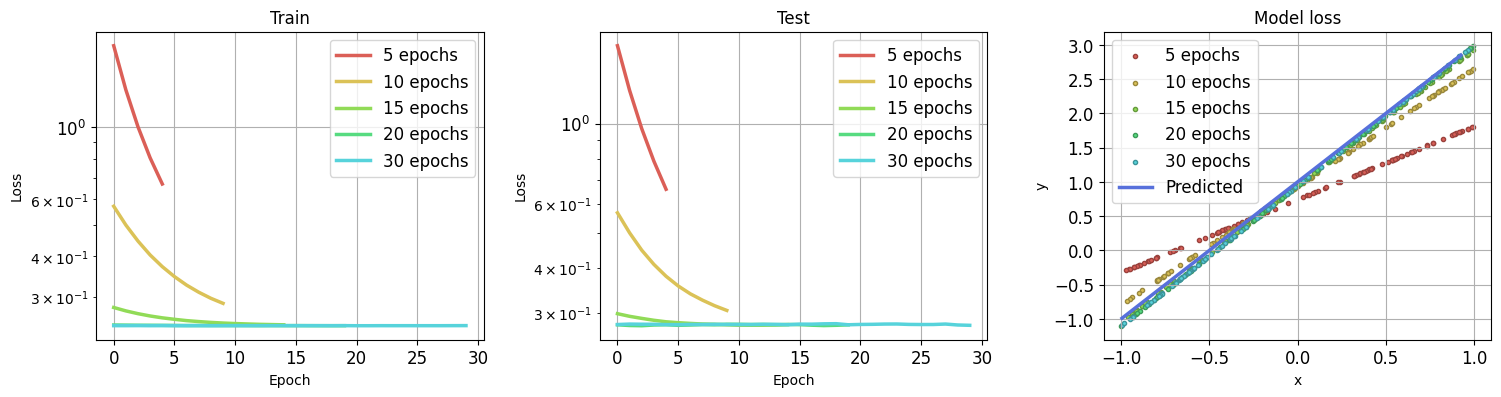

In [2]:
m = 2 # slope
b = 1 # intersect

# Definition of function
def f(x):
    return m*x + b

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid)   # Ideal target

sigma = 0.5     # Noise standard deviation
# Actual measures from which we want to guess regression parameters
y_train = np.random.normal(f(x_train), sigma) 
y_valid = np.random.normal(f(x_valid), sigma)

# NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])     # Compile the model

array_epoch = np.array([5, 10, 15, 20, 30])  # Array of number of epochs

plt.figure(figsize=(18, 4))

for i in range(len(array_epoch)):

    # Fit the model using training dataset
    history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = array_epoch[i], shuffle = True, validation_data = (x_valid, y_valid))

    # Plot training & validation loss values
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], color=colors[i], linewidth=2.5, label=str(array_epoch[i]) + ' epochs')
    plt.title('Train')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['val_loss'], color=colors[i], linewidth=2.5, label=str(array_epoch[i]) + ' epochs')
    plt.title('Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    plt.subplot(1, 3, 3)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], marker='.', edgecolors=tuple(np.array(colors[i]) * 0.7), label=str(array_epoch[i]) + ' epochs')
    if i == len(array_epoch) - 1:
        plt.plot(x_valid, y_target, color=colors[len(array_epoch)], linewidth=2.5, label="Predicted")
    plt.title('Model loss')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Setting the number of data points $N_{train} = 500$ and $N_{epochs} = 30$, I performed linear regression using $\sigma = 0, \ 0.1, \ 0.2, \ 0.5, \ 1., \ 1.5$. I ran a `for` loop over the different values of noise, within which I trained the neural network.

By increasing the noise value, the loss values increase, and as the number of epochs increases, the curves become more separated except for $\sigma = 0$, where the loss value decreases more rapidly than the other curves.

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2935 - mse: 1.2935 - val_loss: 0.7817 - val_mse: 0.7817
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8398 - mse: 0.8398 - val_loss: 0.4958 - val_mse: 0.4958
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885 - mse: 0.4885 - val_loss: 0.3292 - val_mse: 0.3292
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3411 - mse: 0.3411 - val_loss: 0.2296 - val_mse: 0.2296
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2484 - mse: 0.2484 - val_loss: 0.1664 - val_mse: 0.1664
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1819 - mse: 0.1819 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 - mse: 0.1283 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1074 - mse: 0.1074 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0772 - mse: 

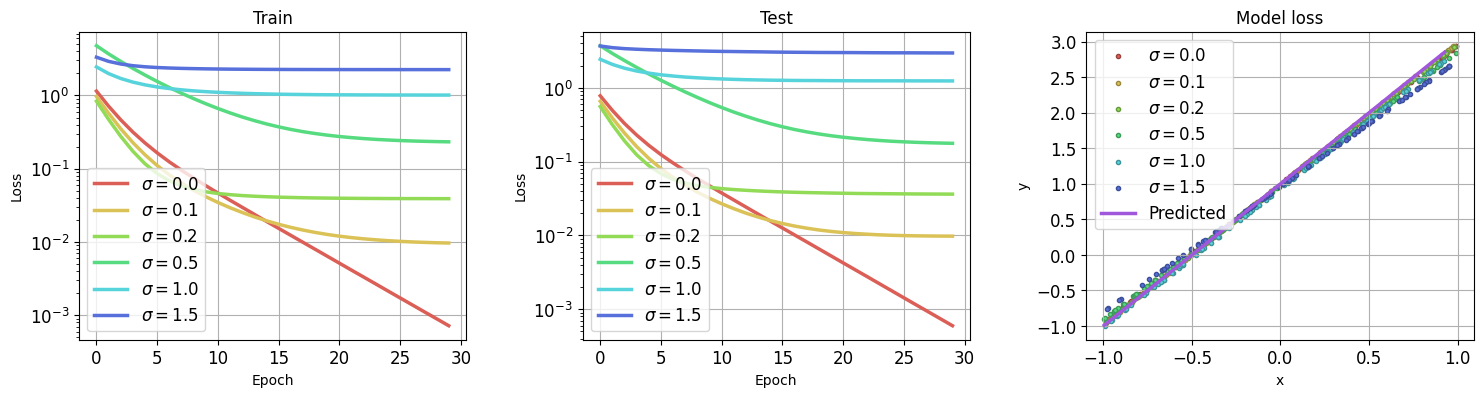

In [3]:
m = 2 # slope
b = 1 # intersect

# Definition of function
def f(x):
    return m*x + b

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid)   # Ideal target

plt.figure(figsize=(18, 4))
array_sigma = np.array([0, 0.1, 0.2, 0.5, 1., 1.5])     # Array of sigma

for i in range(len(array_sigma)):
    
    # Actual measures from which we want to guess regression parameters
    y_train = np.random.normal(f(x_train), array_sigma[i]) 
    y_valid = np.random.normal(f(x_valid), array_sigma[i])

    # NN model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])     # Compile the model

    # Fit the model using training dataset
    history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 30, shuffle = True, validation_data = (x_valid, y_valid))

    # Plot training & validation loss values
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], color=colors[i], linewidth=2.5, label=r'$\sigma=$' + str(array_sigma[i]))
    plt.title('Train')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['val_loss'], color=colors[i], linewidth=2.5, label=r'$\sigma=$' + str(array_sigma[i]))
    plt.title('Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    plt.subplot(1, 3, 3)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], marker='.', edgecolors=tuple(np.array(colors[i]) * 0.7), label=r'$\sigma=$' + str(array_sigma[i]))
    if i == len(array_sigma) - 1:
        plt.plot(x_valid, y_target, color=colors[len(array_sigma)], linewidth=2.5, label="Predicted")
    plt.title('Model loss')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Setting the noise $\sigma = 0.5$ and $N_{epochs} = 30$, I performed linear regression using $N_{train} = 50, \ 100, \ 200, \ 500,  \ 1000, \ 2000$. I ran a `for` loop over the different values of $N_{train}$, within which I trained the neural network.

Increasing the number of point data used, the loss values decrease but after $N_{train} = 500$ the loss values are very close.

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 3.9075 - mse: 3.9075 - val_loss: 4.4913 - val_mse: 4.4913
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6636 - mse: 3.6636 - val_loss: 4.3574 - val_mse: 4.3574
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6762 - mse: 3.6762 - val_loss: 4.2392 - val_mse: 4.2392
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2625 - mse: 3.2625 - val_loss: 4.1104 - val_mse: 4.1104
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.3208 - mse: 3.3208 - val_loss: 3.9870 - val_mse: 3.9870
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.2069 - mse: 3.2069 - val_loss: 3.8685 - val_mse: 3.8685
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0202 - mse: 3.0202 - val_loss: 3.7530 - val_mse: 3.7530
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.1702 - mse: 3.1702 - val_loss: 3.6492 - val_mse: 3.6492
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.8562 - mse: 2.8562 - 

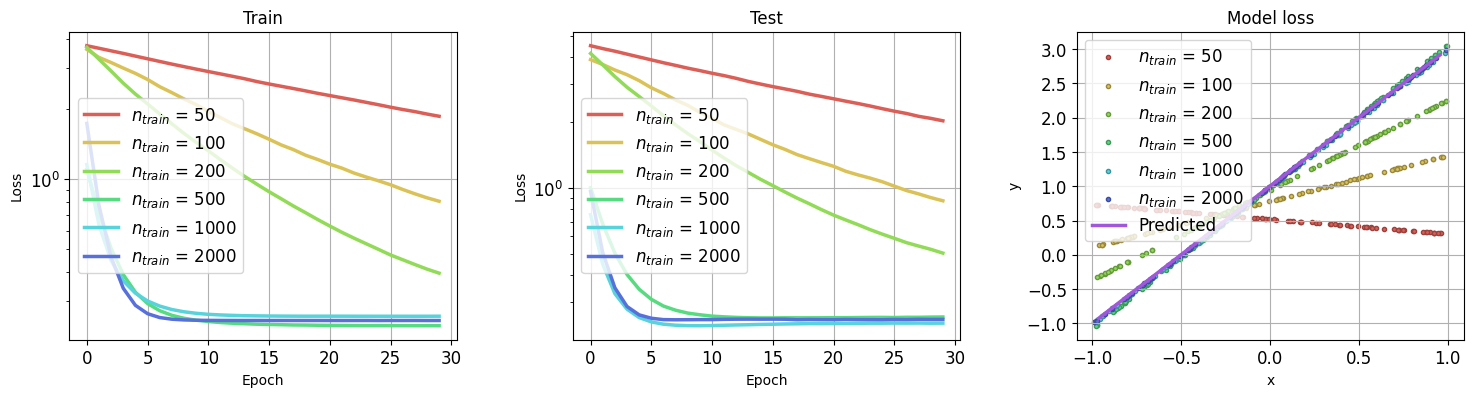

In [13]:
m = 2 # slope
b = 1 # intersect

# Definition of function
def f(x):
    return m*x + b

# Generate training inputs
np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid)   # Ideal target
sigma = 0.5

plt.figure(figsize=(18, 4))
array_train = np.array([50, 100, 200, 500, 1000, 2000])     # Array of n_train

for i in range(len(array_train)):
    
    # Actual measures from which we want to guess regression parameters
    x_train = np.random.uniform(-1, 1, array_train[i])
    y_train = np.random.normal(f(x_train), sigma) 
    y_valid = np.random.normal(f(x_valid), sigma)

    # NN model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])     # Compile the model

    # Fit the model using training dataset
    history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 30, shuffle = True, validation_data = (x_valid, y_valid))

    # Plot training & validation loss values
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], color=colors[i], linewidth=2.5, label=r'$n_{train}$ = ' + str(array_train[i]))
    plt.title('Train')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['val_loss'], color=colors[i], linewidth=2.5, label=r'$n_{train}$ = ' + str(array_train[i]))
    plt.title('Test')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    plt.subplot(1, 3, 3)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], marker='.', edgecolors=tuple(np.array(colors[i]) * 0.7), label=r'$n_{train}$ = ' + str(array_train[i]))
    if i == len(array_train) - 1:
        plt.plot(x_valid, y_target, color=colors[len(array_train)], linewidth=2.5, label="Predicted")
    plt.title('Model loss')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

I also made heatmaps with different combinations of the values of the three parameters used. 

Increasing the noise values causes the loss function to increase most of the time, as expected. Increasing the number of epochs or the number of training points, the loss decreases most of the time, as we have seen in the previous plots. It is interesting to note that at the bottom right of each map, the loss values are very similar: it is possible to choose a compromise between $N_{epochs}$ and $N_{train}$ without having to use high values for both parameters.
It is interesting to note that choosing $\sigma = 0$ isn't always the best choice, especially with small values of $N_{epochs}$ and $N_{train}$. Indeed, the loss values are greater than their counterparts in the other maps.

In [14]:
m = 2 # slope
b = 1 # intersect

# Definition of function
def f(x):
    return m*x + b

# Generate training inputs
np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid)   # Ideal target

array_sigma = np.array([0, 0.1, 0.2, 0.5, 1., 1.5])         # Array of sigma
array_epoch = np.array([5, 10, 15, 20, 30])                 # Array of number of epochs
array_train = np.array([50, 100, 200, 500, 1000, 2000])     # Array of n_train
array_matrix = []

for i in range(len(array_sigma)):

    matrix = np.zeros((len(array_train), len(array_epoch)))

    for j in range(len(array_train)):

        # Actual measures from which we want to guess regression parameters
        x_train = np.random.uniform(-1, 1, array_train[j])
        y_train = np.random.normal(f(x_train), array_sigma[i]) 
        y_valid = np.random.normal(f(x_valid), array_sigma[i])

        # NN model
        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))

        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])     # Compile the model

        for k in range(len(array_epoch)):

            # Fit the model using training dataset
            history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = array_epoch[k], shuffle = True, validation_data = (x_valid, y_valid))
            matrix[j, k] = history.history['val_loss'][-1]

    array_matrix.append(matrix)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3.0262 - mse: 3.0262 - val_loss: 3.6890 - val_mse: 3.6890
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5371 - mse: 2.5371 - val_loss: 3.5704 - val_mse: 3.5704
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7775 - mse: 2.7775 - val_loss: 3.4755 - val_mse: 3.4755
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6704 - mse: 2.6704 - val_loss: 3.3812 - val_mse: 3.3812
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.6148 - mse: 2.6148 - val_loss: 3.2900 - val_mse: 3.2900
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.4509 - mse: 2.4509 - val_loss: 3.1920 - val_mse: 3.1920
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.4493 - mse: 2.4493 - val_loss: 3.1041 - val_mse: 3.1041
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.3580 - mse: 2.3580 - val_loss: 3.0189 - val_mse: 3.0189
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.2296 - mse: 2.2296 - val_l

<Figure size 640x480 with 0 Axes>

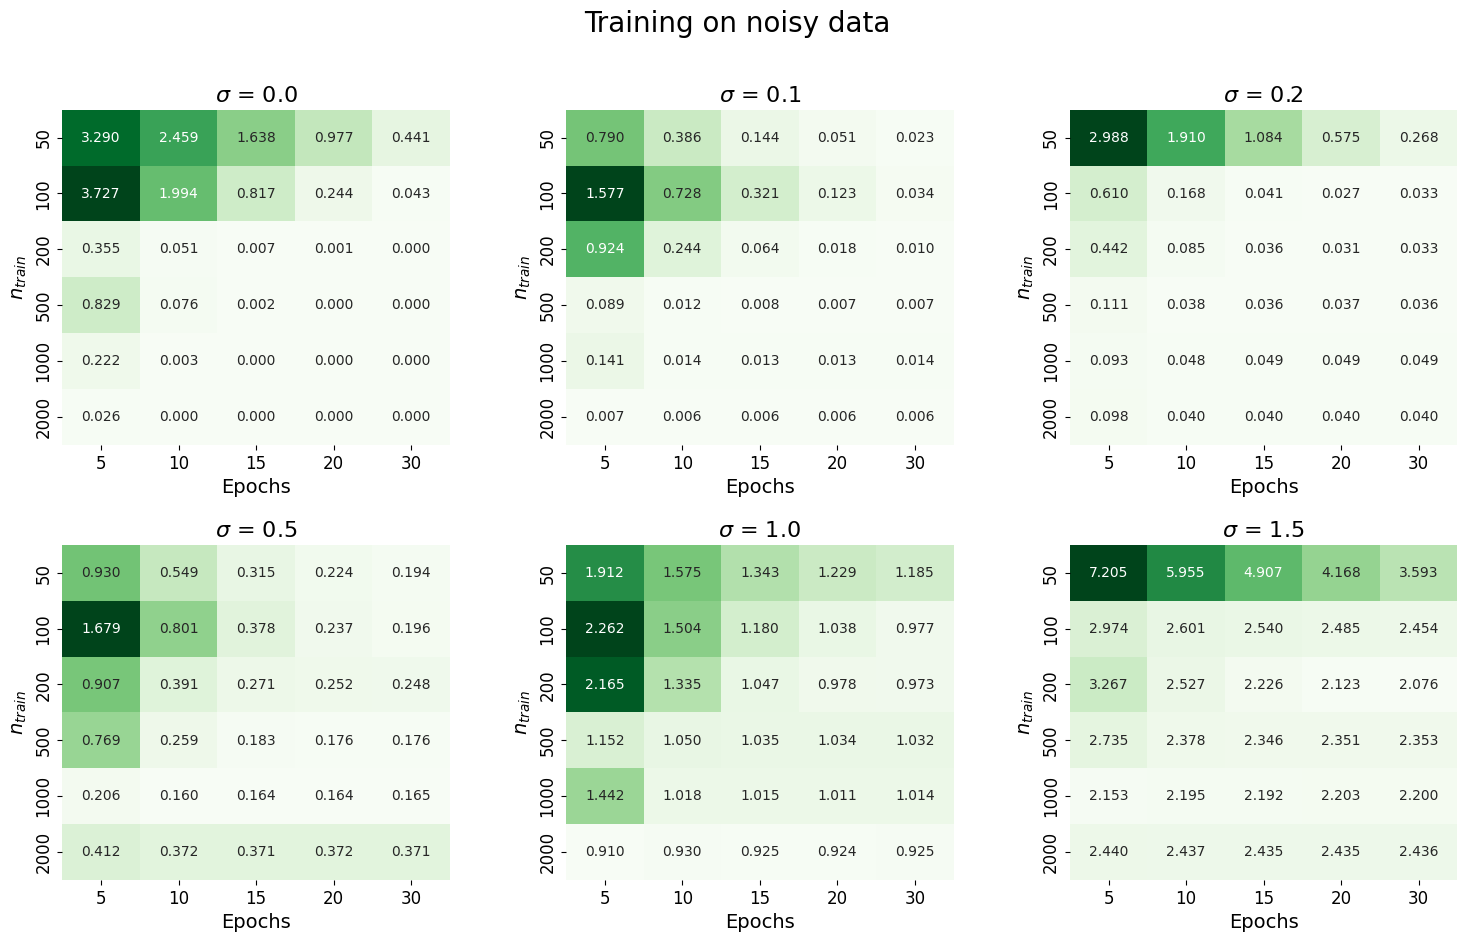

In [32]:
# Create the plot
plt.figure(figsize=(18, 10))

for i in range(len(array_sigma)):
    ax = plt.subplot(2, 3, i + 1)
    sns.heatmap(array_matrix[i], cmap='Greens', annot=True, fmt=".3f", ax=ax, cbar=False)
    plt.title(f'$\sigma$ = {array_sigma[i]}', fontsize=title_size)
    plt.ylabel(r'$n_{train}$', fontsize=axis_size)
    plt.xlabel('Epochs', fontsize=axis_size)
    plt.xticks(ticks=np.arange(len(array_epoch)) + 0.5, labels=array_epoch, fontsize=value_size)
    plt.yticks(ticks=np.arange(len(array_train)) + 0.5, labels=array_train, fontsize=value_size)

# Adjust the spacing between subplots
plt.suptitle('Training on noisy data', fontsize=title_size + 4)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()


## Exercise 11.2
### Assignment

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Exercise 11.2 
### Resolution

Using the previus results, I generated the train and test points using $\sigma=0.25$ and $N_{train}= 1000$.

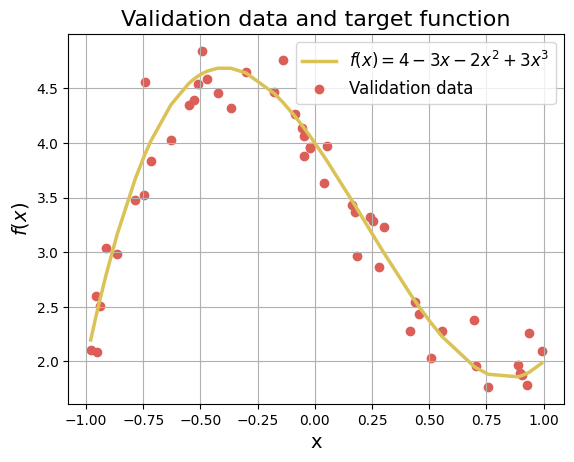

In [81]:
# Define the function
def f(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.25 # noise standard deviation
batch_size = 32 # batch size
epochs = 30 # epochs
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, color=colors[1], linewidth = 2.5, label=r'$f(x)=4 - 3x - 2x^2 + 3x^3$')
plt.scatter(x_valid, y_valid, color=colors[0], label='Validation data')
plt.title('Validation data and target function', fontsize=title_size)
plt.xlabel('x', fontsize=axis_size)
plt.ylabel(r'$f(x)$', fontsize=axis_size)
plt.legend(fontsize=legend_size)
plt.grid(True)
plt.show()

I created a neural network with three layers:
- The first layer has 80 neurons and `softsign` as the activation function.
- The second layer has 40 neurons and `softsign` as the activation function.
- The last layer has only one neuron for the output.

I tried to compile with different optimizers, loss functions, and metrics. The best result I have obtained is the one where I used the `Adam` optimizer with a learning rate of 0.001 (step size used by the optimization algorithm), `Huber` as the loss function, and `mse` (Mean Squared Error) as the metric. I used $N_{epochs} = 30$. I also compiled with one of the attempts, where I used the `SGD` optimizer and `mse` as both the loss function and metric, to show the difference.

As it is possible to see in the plot, the loss values of the best model I found are one order of magnitude smaller than those of the other models used. The loss values of the training and validation data for the best model are very similar, which indicates that the model can predict the validation data quite well. Because after 15 epochs the loss values decrease very slowly, it would have been possible to use fewer epochs.

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5234 - mse: 5.5234 - val_loss: 0.5714 - val_mse: 0.5714
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5533 - mse: 0.5533 - val_loss: 0.5434 - val_mse: 0.5434
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4889 - mse: 0.4889 - val_loss: 0.5495 - val_mse: 0.5495
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4568 - mse: 0.4568 - val_loss: 0.5665 - val_mse: 0.5665
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 0.5432 - val_mse: 0.5432
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.5272 - val_mse: 0.5272
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4313 - mse: 0.4313 - val_loss: 0.5163 - val_mse: 0.5163
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.4991 - val_mse: 0.4991
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3756 - mse: 

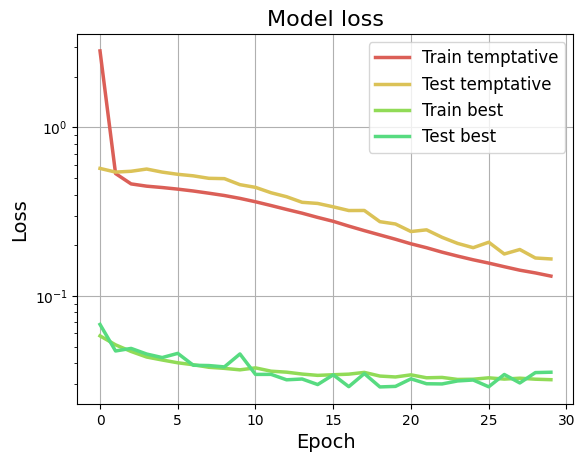

Best model:
Test loss:		 0.03526810556650162
Test accuracy:		 0.07053621113300323
Test loss exact:	 0.004898733459413052
Test accuracy exact:	 0.009797466918826103


In [86]:
# Create the model
model = Sequential()
model.add(Dense(80, input_shape=(1,), activation='softsign'))
model.add(Dense(40, activation='softsign'))
model.add(Dense(1))


# Errate model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])  # Compile the model
history= model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_valid, y_valid))   # Fit the model
plt.plot(history.history['loss'], color=colors[0], linewidth = 2.5, label='Train temptative')
plt.plot(history.history['val_loss'], color=colors[1], linewidth = 2.5, label='Test temptative')

# Best model
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(), metrics=['mse'])   # Compile the model
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_valid, y_valid))     # Fit the model

# Plot training & validation loss values
plt.plot(history.history['loss'], color=colors[2], linewidth = 2.5, label='Train best')
plt.plot(history.history['val_loss'], color=colors[3], linewidth = 2.5, label='Test best')
plt.title('Model loss', fontsize=title_size)
plt.ylabel('Loss', fontsize=axis_size)
plt.yscale('log')
plt.xlabel('Epoch', fontsize=axis_size)
plt.legend(fontsize=legend_size)
plt.grid(True)
plt.show()

print("Best model:")
score = model.evaluate(x_valid, y_valid, batch_size = batch_size, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

score = model.evaluate(x_valid, y_target, batch_size = batch_size, verbose = 0)
print('Test loss exact:\t', score[0])
print('Test accuracy exact:\t', score[1])

I used the best model found to predict the function's behavior in the interval $\left[-1,1\right]$ with excellent results, except at the boundaries where the model deviates from the true values due to the lack of training points. Outside of the training interval, the neural network is unable to predict the function's behavior.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


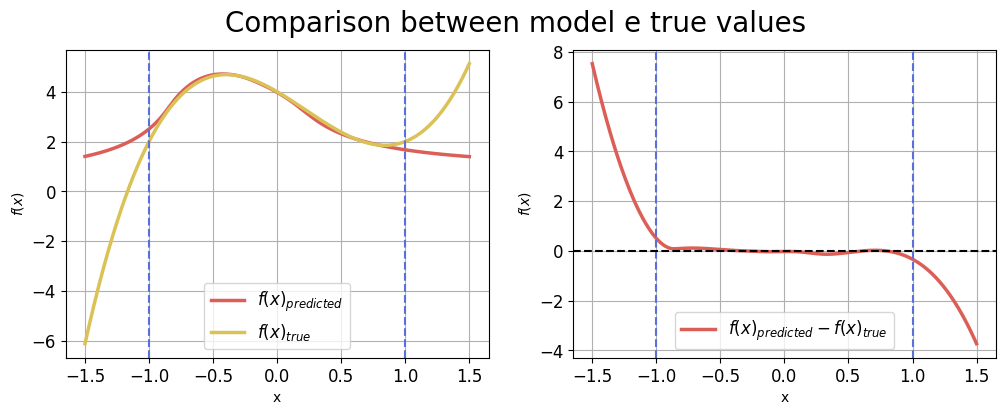

In [32]:
x = np.linspace(-1.5, 1.5, 500)
y = model.predict(x).flatten()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y, color=colors[0], linewidth = 2.5, label=r"$f(x)_{predicted}$")
plt.plot(x, f(x), color=colors[1], linewidth = 2.5, label=r"$f(x)_{true}$")
plt.xlabel(r'x')
plt.ylabel(r'$f(x)$')
plt.axvline(x=-1, color=colors[5], linestyle='--')
plt.axvline(x=1, color=colors[5], linestyle='--')
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y - f(x), color=colors[0],  linewidth = 2.5, label=r"$f(x)_{predicted} - f(x)_{true}$")
plt.xlabel(r'x')
plt.ylabel(r'$f(x)$')
plt.axvline(x=-1, color=colors[5], linestyle='--')
plt.axvline(x=1, color=colors[5], linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

plt.suptitle('Comparison between model e true values', fontsize = title_size + 4)
plt.show()

## Exercise 11.3
### Assignment
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Resolution

I generated the train and test point using $\sigma=0.25$, $N_{epochs}=50$ and $N_{train}= 10000$ and I created a neural network with four layers:
- The first layer has 40 neurons, `relu` as the activation function and two inputs (x and y).
- The second layer has 30 neurons and `tanh` as the activation function.
- The third layer has 20 neurons and `tanh` as the activation function.
- The last layer has only one neuron for the output.

I tried to compile with different optimizers, loss functions and metrics. The best result I have obtained is the one where I used the `Adam` optimizer with a learning rate of 0.001 (step size used by the optimization algorithm), `Huber` as the loss function, and `mse` (Mean Squared Error) as the metric.

Because after 15 epochs the loss values decrease very slowly, it would have been possible to use fewer epochs. Despite the slight fluctuations in the loss values of the test, they are similar to the training ones, which indicates that the model can predict the validation data quite well.

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0911 - mse: 0.1869 - val_loss: 0.0560 - val_mse: 0.1121
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0420 - mse: 0.0839 - val_loss: 0.0433 - val_mse: 0.0867
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0381 - mse: 0.0762 - val_loss: 0.0386 - val_mse: 0.0771
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0357 - mse: 0.0714 - val_loss: 0.0462 - val_mse: 0.0923
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0350 - mse: 0.0700 - val_loss: 0.0379 - val_mse: 0.0758
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0348 - mse: 0.0697 - val_loss: 0.0332 - val_mse: 0.0664
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0343 - mse: 0.0687 - val_loss: 0.0336 - val_mse: 0.0672
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0354 - mse: 0.0708 - val_loss: 0.0388 - val_mse: 0.0775
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

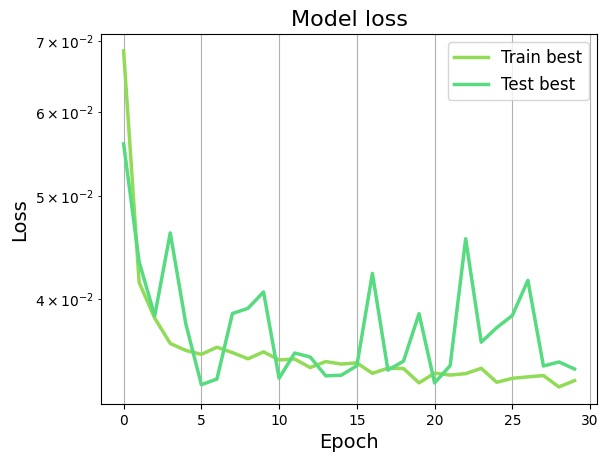

Best model:
Test loss:		 0.03435400873422623
Test accuracy:		 0.06870801746845245
Test loss exact:	 0.0036499029956758022
Test accuracy exact:	 0.0072998059913516045


In [107]:
def f(x, y):
    return np.sin(x**2 + y**2)

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort()
y_valid.sort()
z_target = f(x_valid, y_valid) # ideal (target) linear function

sigma = 0.25 # noise standard deviation
bach_size = 32
epochs = 30
z_train = np.random.normal(f(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# Create the model
model = Sequential()
model.add(Dense(40, input_shape=(2,), activation= "relu"))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss=Huber(), metrics=['mse'])

# Fit the model
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train, batch_size=bach_size, epochs=epochs, shuffle=True, validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

# Plot training & validation loss values
plt.plot(history.history['loss'], color=colors[2], linewidth = 2.5, label='Train best')
plt.plot(history.history['val_loss'], color=colors[3], linewidth = 2.5, label='Test best')
plt.title('Model loss', fontsize=title_size)
plt.ylabel('Loss', fontsize=axis_size)
plt.yscale('log')
plt.xlabel('Epoch', fontsize=axis_size)
plt.legend(fontsize=legend_size)
plt.grid(True)
plt.show()

print("Best model:")
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size = batch_size, verbose=0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size = batch_size, verbose = 0)
print('Test loss exact:\t', score[0])
print('Test accuracy exact:\t', score[1])

The model is able to follow the behavior of the function, especially in the middle part of the chosen interval. At the boundaries, as happened with the 1D function, the model fits poorly.

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


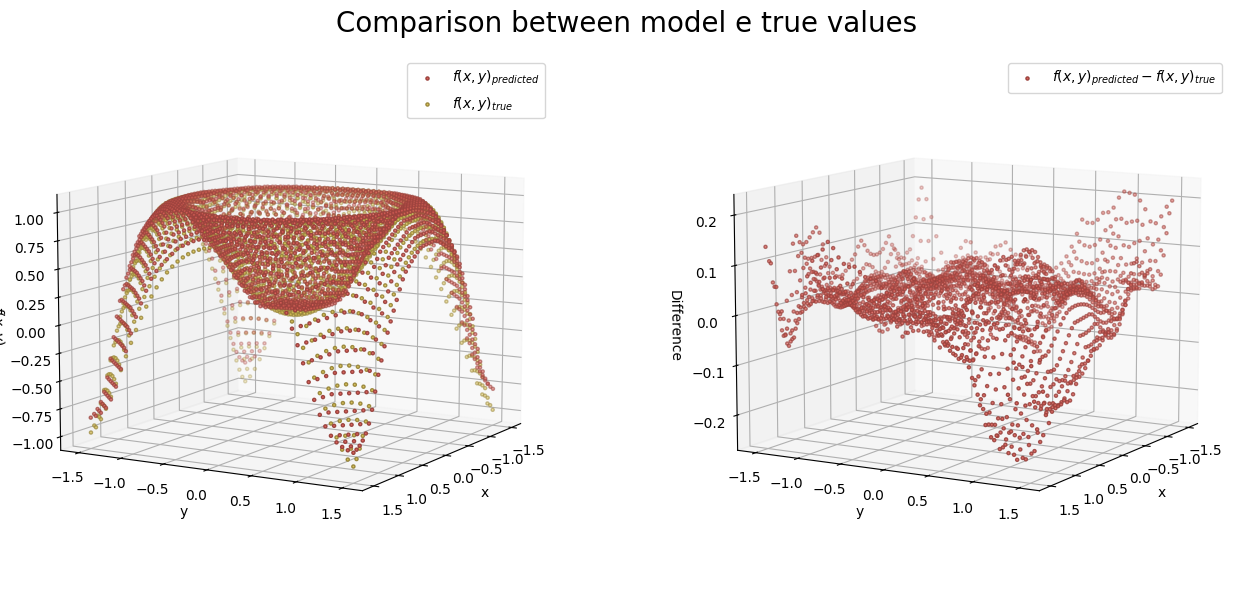

In [110]:
np.random.seed(0)
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-1.5, 1.5, 50)
x, y = np.meshgrid(x, y)
input_data = np.column_stack((x.flatten(), y.flatten()))

# Calcola i valori predetti dalla rete neurale
z = model.predict(input_data).flatten()
z = z.reshape(x.shape)

# Calcola i valori target
target = f(x, y)

# Calcola la differenza tra i valori predetti e i valori target
difference = z - target

# Crea il primo subplot con i valori predetti e target
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, label=r"$f(x, y)_{predicted}$", color=colors[0], marker='.', edgecolors=tuple(np.array(colors[0]) * 0.7))
ax1.scatter(x, y, f(x,y), label=r"$f(x, y)_{true}$", color=colors[1], marker='.', edgecolors=tuple(np.array(colors[1]) * 0.7))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel(r'$f(x,y)$')
ax1.view_init(elev=10, azim=30)
ax1.legend()

# Crea il secondo subplot con la differenza tra i valori predetti e i valori target
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, difference, label=r"$f(x, y)_{predicted} - f(x, y)_{true}$", color=colors[0], marker='.', edgecolors=tuple(np.array(colors[0]) * 0.7))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Difference')
ax2.view_init(elev=10, azim=30)
ax2.legend()

plt.suptitle('Comparison between model e true values', fontsize = title_size + 4)
plt.tight_layout()
plt.show()
